<a href="https://colab.research.google.com/github/hc0rd31r0/Bootcamp_Data_Science/blob/main/Bootcamp_DS_modulo3_aula5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Módulo 3 - Análise de séries temporais
---

## Aula 01 - Entendendo a série temporal

Alguns gráficos e explicações foram removidas da aula 1 e 2, ficando comandos que alteravam o dataFrame.

### Coleta de dados e primeiras análises

In [1]:
# importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# configurações default
# pd.options.display.float_format = "{:.2f}".format

import warnings
warnings.filterwarnings('ignore')

In [2]:
#url onde está a nossa base de dados
url = 'https://github.com/alura-cursos/Prophet_covid/blob/main/dados_covid_sp.zip?raw=true'

#carrego as informações para a variável dados (a base está no formato csv mas em um arquivo zipado)
dados = pd.read_csv(url, compression='zip', engine='python', sep=";", thousands=".", decimal=",")

In [3]:
#informar ao pandas que a coluna [datahora] é do tipo datetime
dados['datahora'] = pd.to_datetime(dados['datahora'], format='%Y-%m-%d')

#Configurando parâmetros default para o mpl
mpl.rcParams['font.size'] = 15
mpl.rcParams['figure.figsize'] = (18,8)

In [4]:
# Dados de São Paulo
dados_sp = dados.query("nome_munic == 'São Paulo'")

In [5]:
# format your data to desired format. Here I chose YYYY-MM-DD but you can set it to whatever you want.
import matplotlib.dates as mdates

####**Desafios #1**

**Desafio 01** - Filtrar a base com alguma outra função

**Desafio 02** - Escolher outro município para fazer a análise

### Taxa de crescimento e média móvel

equação de reta

y = ax + b  <=== reta inclinada

A diferenciação me dá o coeficiente angular da reta, ângulo de crescimento dessa reta, no nosso caso é 1 (um)

A **diferenciação** me dá a **taxa de crescimento** de uma reta ou curva.


In [6]:
dados_sp['taxa_de_crescimento_casos'] = dados_sp['casos_novos'].diff()
dados_sp['taxa_de_crescimento_obitos'] = dados_sp['obitos_novos'].diff()

In [7]:
dados_sp['ano'] = pd.DatetimeIndex(dados_sp['datahora']).year
dados_2021 = dados_sp[dados_sp.ano.eq(2021)]

#### **Média Móvel**

In [8]:
dados_sp['media_movel_casos'] = dados_sp['casos_novos'].rolling(window=7, center=False).mean()
dados_sp['media_movel_obitos'] = dados_sp['obitos_novos'].rolling(window=7, center=False).mean()

### Correlação e função de autocorrelação


#### **Sazonalidade**

Por correlação.

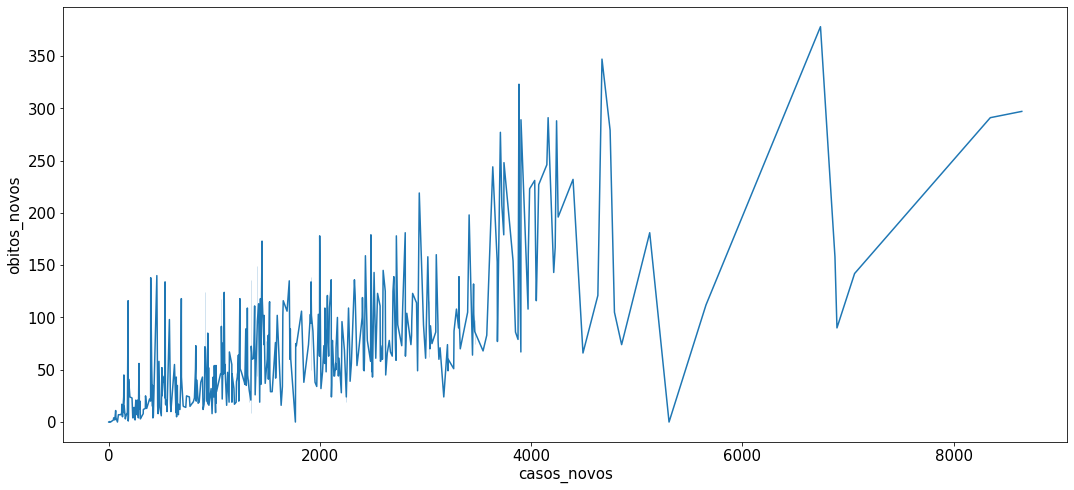

In [9]:
sns.lineplot(x='casos_novos', y='obitos_novos', data=dados_sp)

In [10]:
dados_202101 = dados_sp.query('mes == 1 & ano == 2021')
dados_202102 = dados_sp.query('mes == 2 & ano == 2021')

 A **sazonalidade** é, portanto, uma variação do número, no nosso caso, do número  de casos novos, de acordo com a função temporal. Podem ser dias, horas, meses ou anos. Conseguimos, desta forma, identificar um padrão - repetição - dentro de uma função temporal (dentro de uma janela de tempo).

Para verificar uma sazonalidade em uma série temporal, temos uma outra ferramenta que chamamos de função de autocorrelação. Com ela, é possível gerar a correlação utilizando o próprio Pandas. Sendo assim, vamos importar uma função do Pandas:

In [11]:
from pandas.plotting import autocorrelation_plot

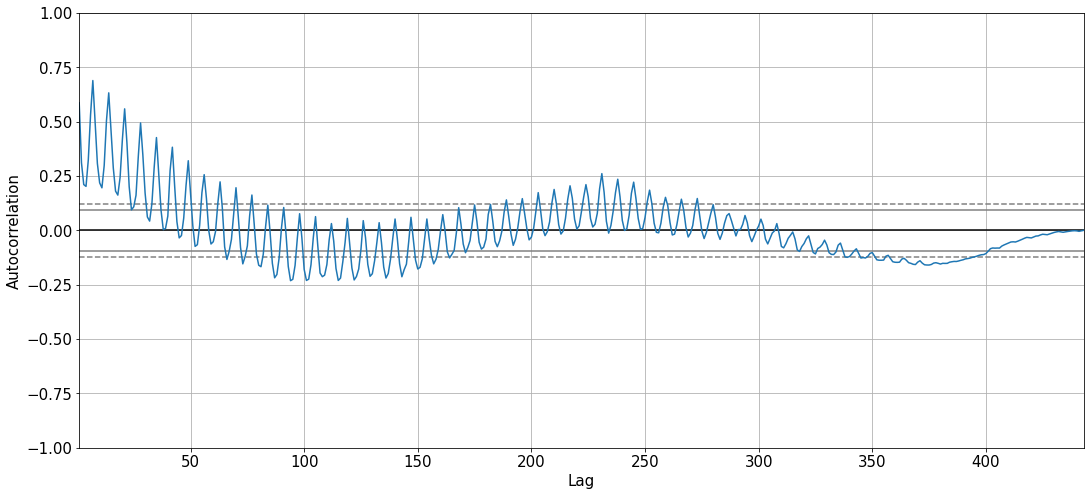

In [12]:
# gráfico em lags
autocorrelation_plot(dados_sp['casos_novos'])

In [13]:
# Testando correlações aleatórias para provar a correlação que fizemos
dados_sp.shape

(443, 31)

### Desafios #2

**Desafio 01**: Um notebook sem warnings

**Desafio 02**: Pico taxa de casos novos coincide com taxa dos óbitos novos.

**Desafio 03**: Fazer melhorias nos gráficos.

**Desafio 04**: Gerar o gráfico da média móvel do número de óbitos e mudar os gráficos de casos para barras. (número de casos em barra e média em linha)

**Desafio 05**: Mover o número de óbitos alguns dias para verificar o resultado no gráfico.

**Desafio 06**: Função de correlação cruzada dos óbitos e casos.

**Desafio 07**: Estudar outros municípios.

O que aprendemos nessa aula:

* Aprendemos o que é uma série temporal;
* Calculamos a taxa de crescimento de um evento em uma série temporal;
* Aprendemos o que é uma média móvel;
* Entendemos o que é correlação e função de autocorrelação.

## Aula 02 - Primeiras Previsões

### Primeiras previsões com o Prophet

In [14]:
df = pd.DataFrame()

In [15]:
# Agora precisamos de duas colunas, e elas, sim, precisam ter um nome que o Prophet espera. 

# O primeiro nome que ele espera é ds, isto é, df['ds']. Essa primeira coluna receberá os dados de tempo.
df['ds'] = dados_sp['datahora']

In [16]:
# coluna y, e que será o nosso alvo, o que estamos querendo prever.
df['y'] = dados_sp['casos_novos']

In [17]:
# importando o algoritmo de Machine Learning do Facebook
from fbprophet import Prophet

In [18]:
modelo = Prophet()

In [19]:
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [20]:
dataframefuturo = modelo.make_future_dataframe(periods=30)

In [21]:
previsao = modelo.predict(dataframefuturo)

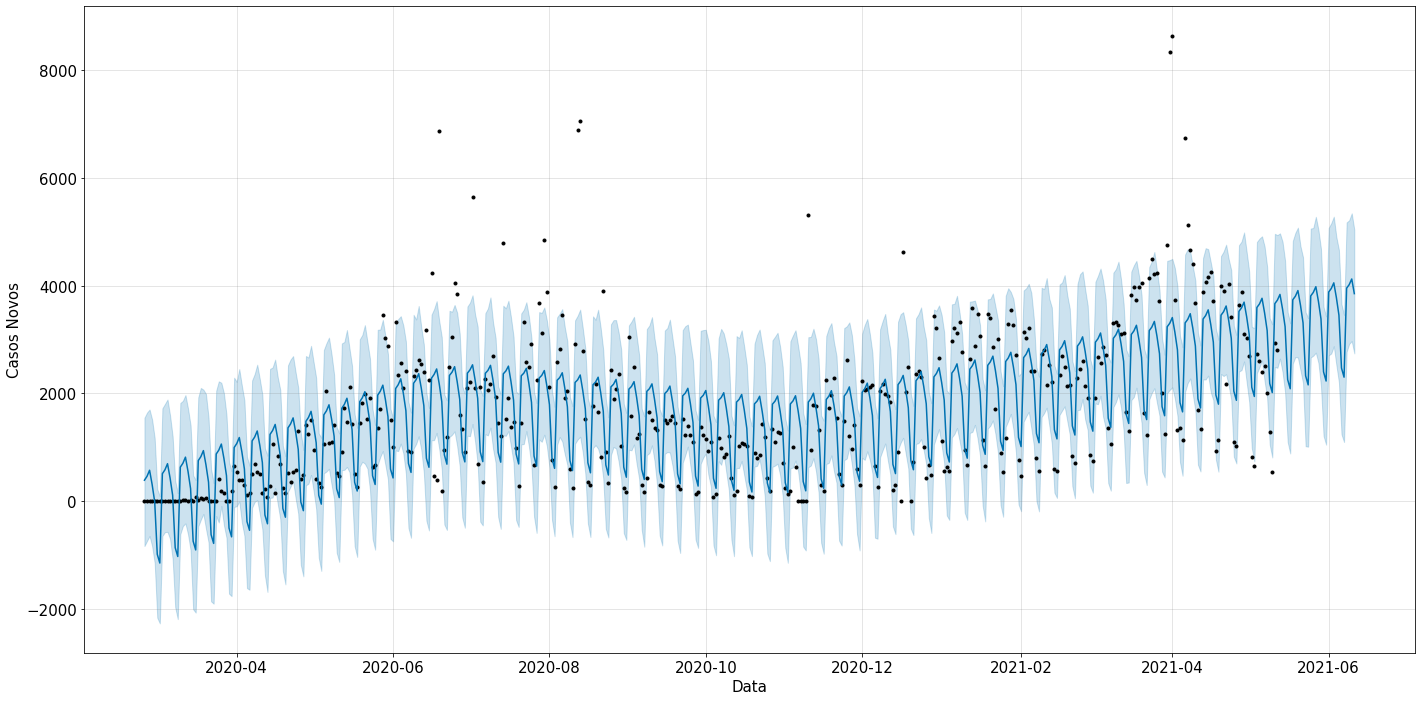

In [22]:
modelo.plot(previsao, xlabel='Data' , ylabel='Casos Novos', figsize=(20,10));
# o ; no final é para não apresentar duas figuras

Na figura temos os pontos pretos que são os nossos dados, os dados reais que conhecemos de número de casos de Covid-19. 
No eixo x temos a "Data" e no eixo y os "Casos novos"

No nosso caso, estamos tentando ajustar um modelo à esses pontos pretos (nossos dados). O modelo ao qual ele está se ajustando é representado pela curva azul escura.

Nós temos uma região azul clara em torno da linha azul escura principal, e que chamamos de intervalo de confiança. Ela representa até onde o nosso ajuste dos dados poderia estar.

Portanto, ele está considerando que podem existir pontos dentro deste intervalo azul-claro, mas que o ajuste mais correto é o da linha azul-escuro, que aparece no centro do gráfico.

Para evitar o ***overfiting*** e testar o nosso modelo, temos que primeiro treinar o modelo, e para isso vamos fornecer um pedaço do Dataframe para o modelo.

---
Vamos trabalhar com dados de treino e teste para avaliar nosso modelo.
Vou utilizar outro conjunto de variáveis para poder analisar/comparar depois.


In [23]:
 df_treino = pd.DataFrame()
 df_treino['ds'] = dados_sp['datahora'][:400]
 df_treino['y'] = dados_sp['casos_novos'][:400]
 modelo2 = Prophet( )

*Karoline*: Allan, por que você está dividindo a base de training test em 400? Como você fez isso?

*Allan*: A ideia é ter uma quantidade maior para treino. Ter os primeiros 400 pontos, porque temos pouco mais de um ano de pandemia. Ela começou em março do ano de 2020, e estamos indo para junho de 2021. Então, a ideia é pegar os 365 dias e mais alguns dias para completarmos um valor fechado. Enfim, geralmente pegamos 70% dos dados para treino e 30% de teste.

In [24]:
dados_sp.shape

(443, 31)

In [25]:
modelo2.fit(df_treino)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Vamos tentar prever os próximos 43 dias.

In [26]:
dataframefuturo2 = modelo2.make_future_dataframe(periods=43)

In [27]:
previsao2 = modelo2.predict(dataframefuturo2)

In [28]:
df_teste = pd.DataFrame()
df_teste['ds'] = dados_sp['datahora'][400:]
df_teste['y']  = dados_sp['casos_novos'][400:]

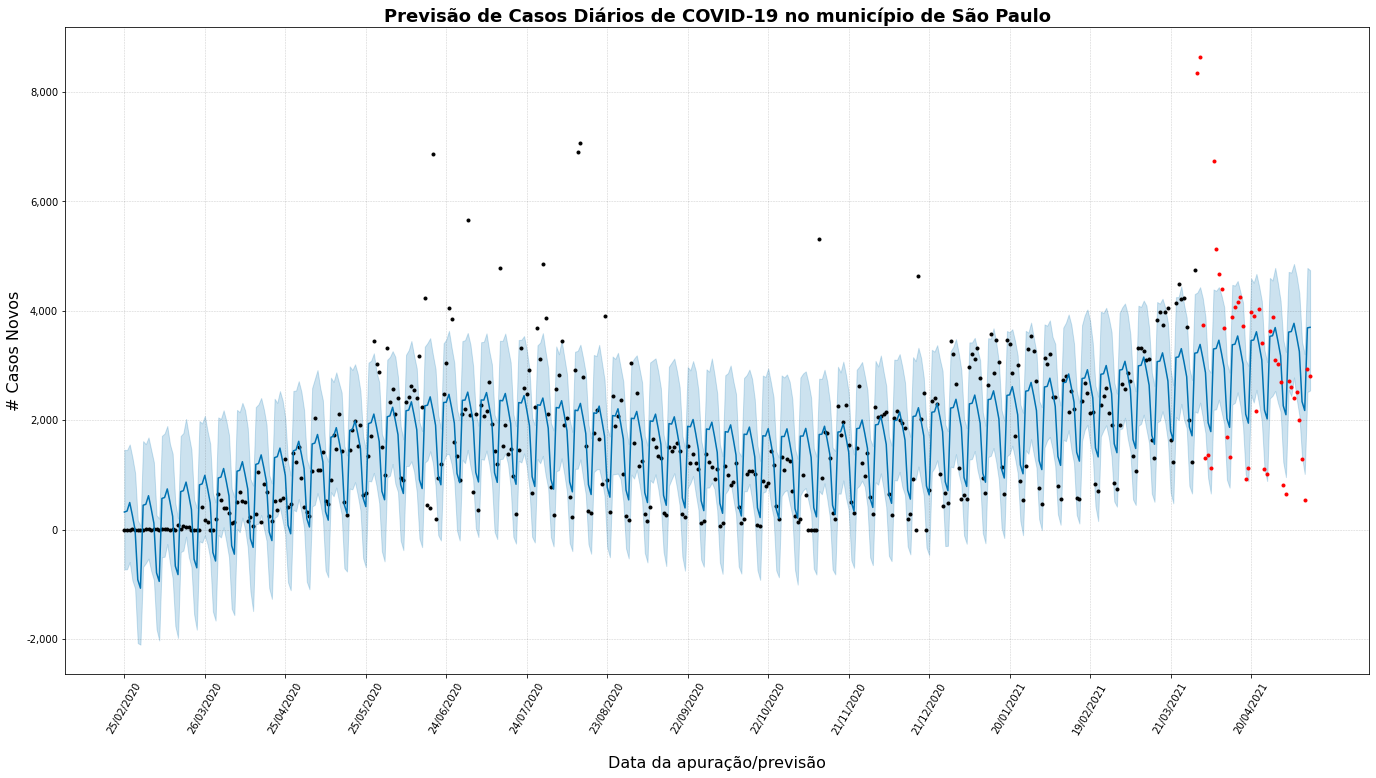

In [29]:
fig, ax = plt.subplots(figsize=(20, 10))
modelo2.plot(previsao2, xlabel='Data' , ylabel='Casos Novos', figsize=(20,10), ax=ax);
plt.title('Previsão de Casos Diários de COVID-19 no município de São Paulo', fontsize=18, fontweight='bold')
plt.xlabel('Data da apuração/previsão', fontsize=16, labelpad=20)
plt.ylabel('# Casos Novos', fontsize=16)
plt.grid(color='black', linestyle='--', linewidth=0.5)
plt.xticks(rotation = 60)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.xaxis.set_major_locator(ticker.IndexLocator(base=30,offset=0))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(10)

plt.plot(df_teste['ds'], df_teste['y'], '.r')
plt.show()

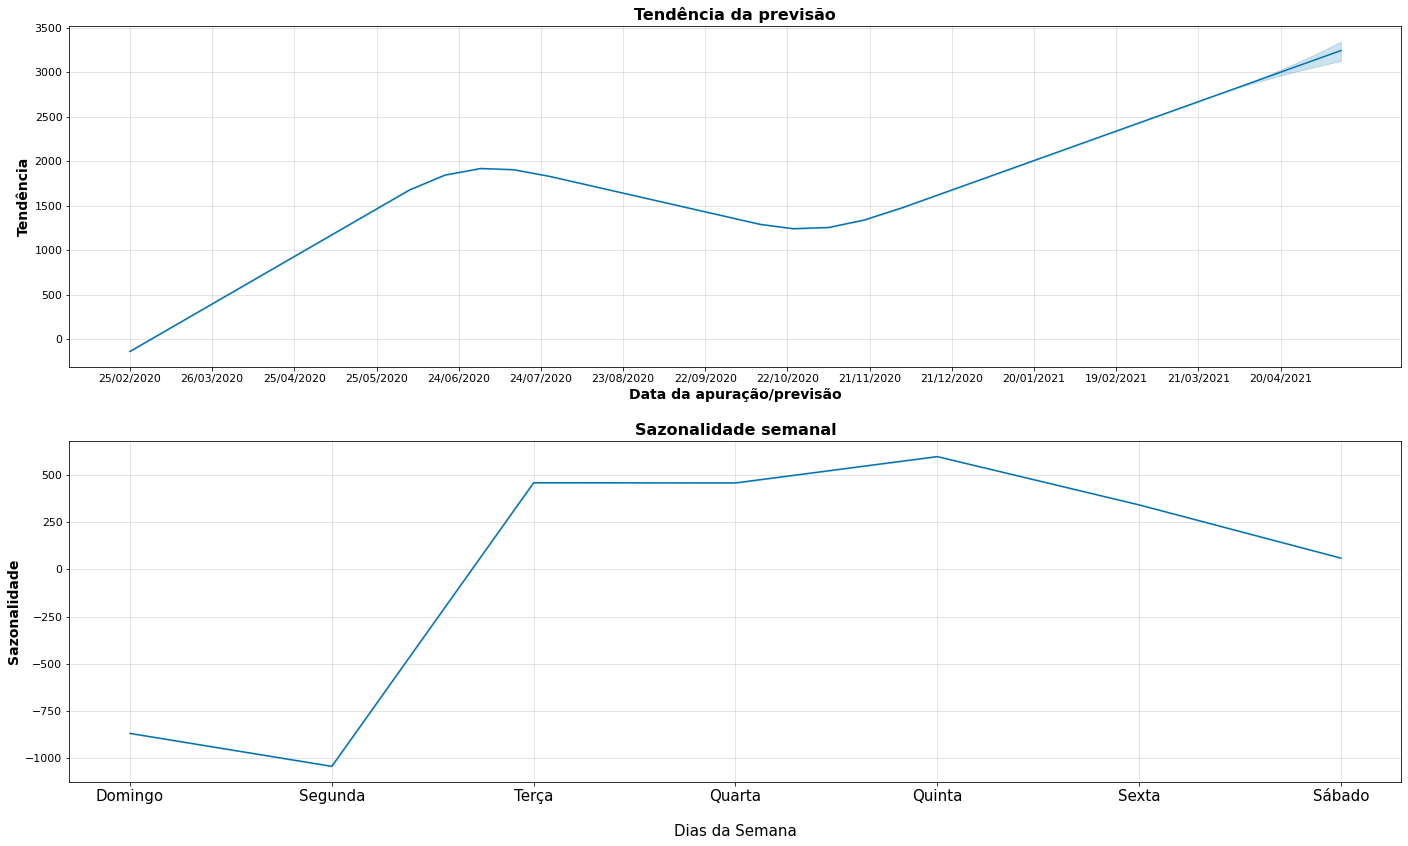

In [30]:
fig = modelo2.plot_components(previsao2, figsize=(20, 12));
ax = fig.get_axes()
ax[0].set_title("Tendência da previsão", fontdict={ 'size': 16, 'weight': 'bold' })
ax[0].set_ylabel("Tendência", fontdict={ 'size': 14 , 'weight': 'bold'})
ax[0].set_xlabel("Data da apuração/previsão", fontdict={ 'size': 14 , 'weight': 'bold'})
ax[0].xaxis.set_major_locator(ticker.IndexLocator(base=30,offset=0))
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))

ax[1].set_title("Sazonalidade semanal", fontdict={ 'size': 16, 'weight': 'bold' })
ax[1].set_ylabel("Sazonalidade", fontdict={ 'size': 14, 'weight': 'bold' })
ax[1].set_xticks(range(0,7))
ax[1].set_xticklabels(["Domingo", "Segunda", "Terça", "Quarta", "Quinta", "Sexta", "Sábado"])
ax[1].set_xlabel("Dias da Semana", labelpad=20)
fig.tight_layout()

# Set the tick labels font
for label in (ax[0].get_xticklabels() + ax[0].get_yticklabels() + ax[1].get_yticklabels()):
    label.set_fontsize(11)

plt.show()

### Desafios #3

**Desafio 08**: Mudar os períodos de previsão.

**Desafio 09**: Explorar a documentação do Prophet e melhorar os gráficos.

**Desafio 10**: Fazer todo o processo de previsão para o número de casos acumulados.

O que aprendemos nessa aula:

* Vimos as primeiras previsões com o PROPHET;
* Fizemos a decomposição de séries temporais.

## Aula 03 - Mudança de tendência

### Mudança de tendência e changepoints

In [31]:
from fbprophet.plot import add_changepoints_to_plot

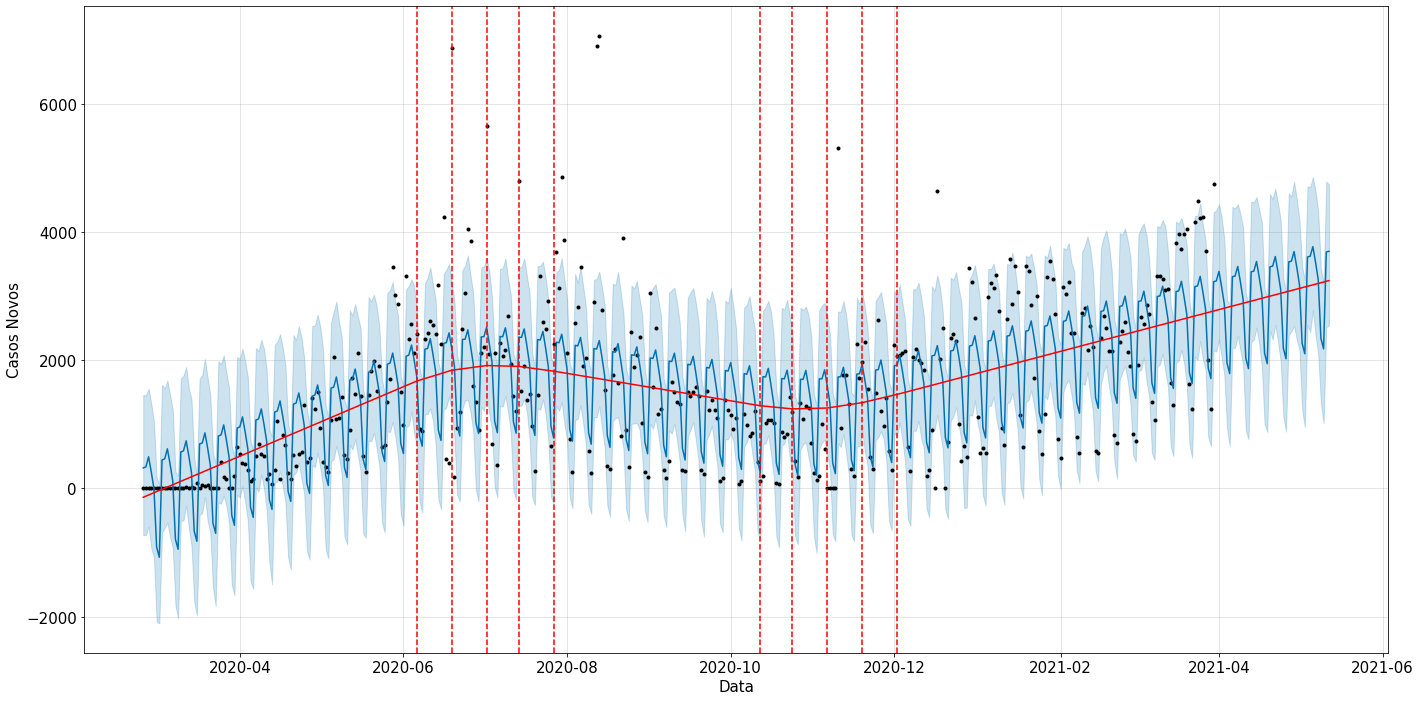

In [32]:
fig = modelo2.plot(previsao2, xlabel='Data' , ylabel='Casos Novos', figsize=(20,10));
a = add_changepoints_to_plot(fig.gca(), modelo2, previsao2)

Crescimento logistico / sigmóide

In [33]:
# modelo_changepoint = Prophet(n_changepoints=50)
# modelo_changepoint = Prophet(n_changepoints=25, changepoint_prior_scale=10.0)
modelo_changepoint = Prophet(changepoints=['2020-12-31'])
modelo_changepoint.fit(df_treino)
previsao_changepoint = modelo_changepoint.predict(modelo_changepoint.make_future_dataframe(periods=43))

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


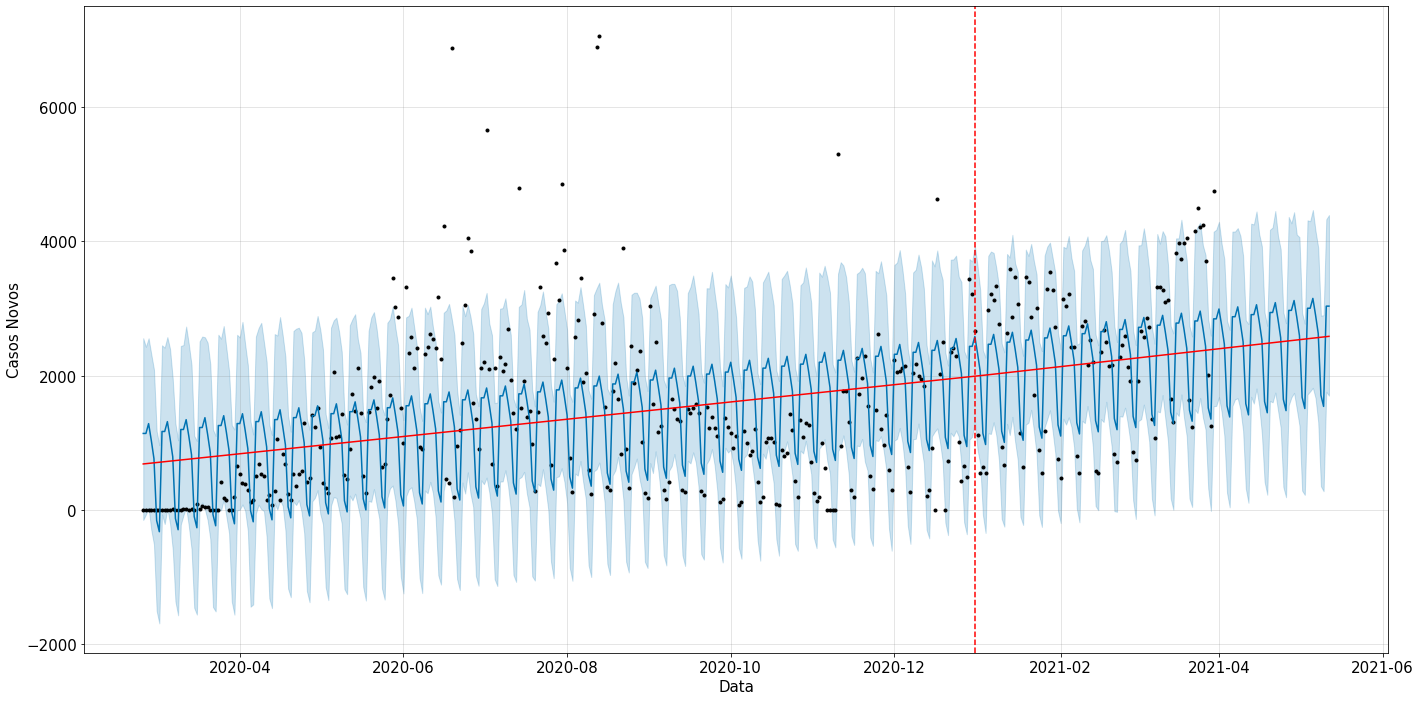

In [34]:
fig = modelo_changepoint.plot(previsao_changepoint, xlabel='Data', ylabel='Casos Novos', figsize=(20,10));
a = add_changepoints_to_plot(fig.gca(), modelo_changepoint, previsao_changepoint)

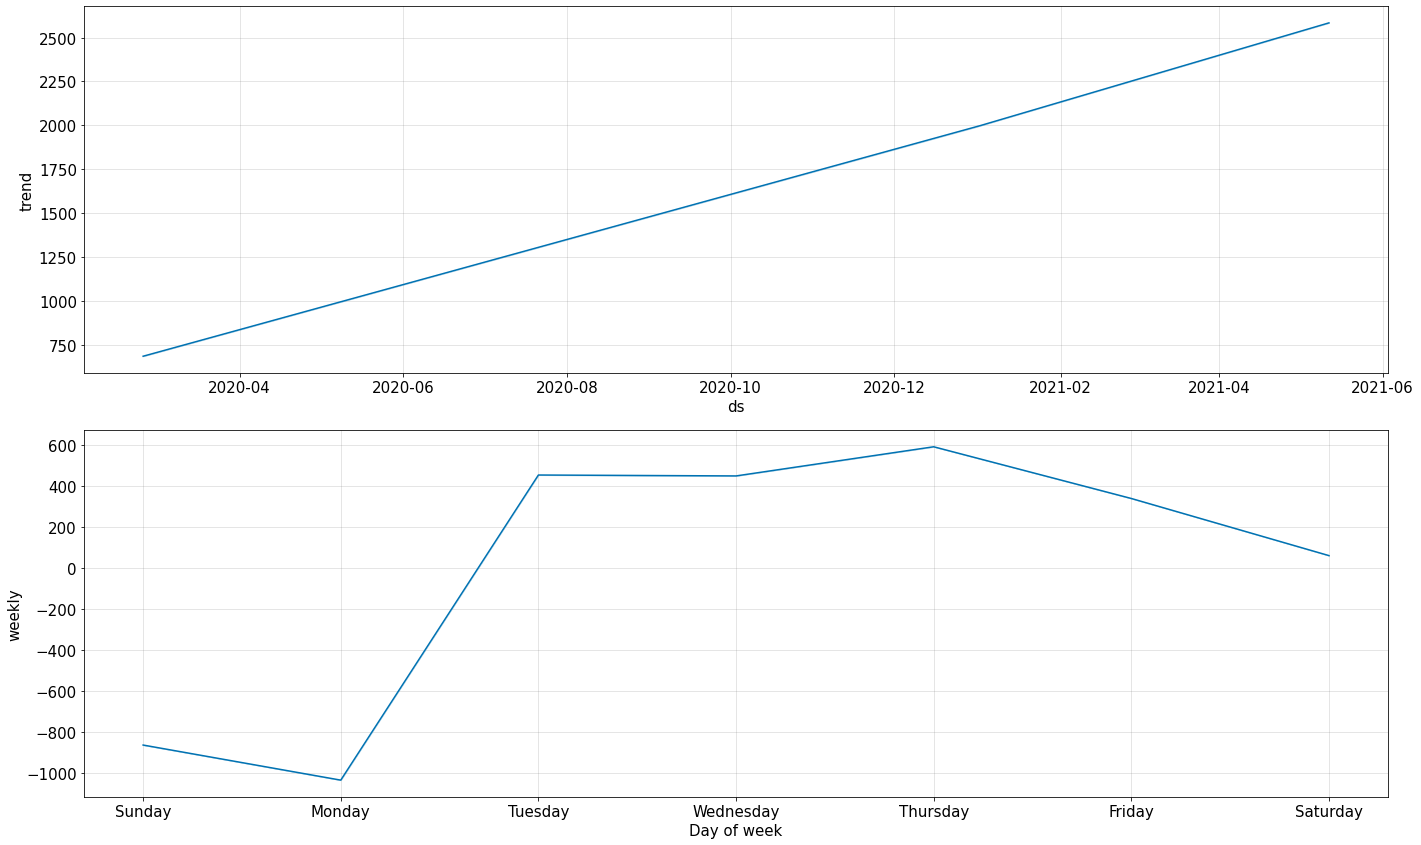

In [35]:
modelo_changepoint.plot_components(previsao_changepoint, figsize=(20, 12));

###**Desafios #4**

**Desafio 11** - Identificar potenciais changepoints.

**Desafio 12** - Desenvolver uma função que roda o modelo automaticamente.

---

O que aprendemos nesta aula:
* Curva com o crescimento logístico;
* Mudança de tendência em uma série temporal;
* Como decidir se houve mudança de tendência através de um gráfico de barras.

## Aula 04 - Feriados e sazonalidades

### Feriados e sazonalidades nas séries temporais

####Feriados

##### Adicionando feriados nacionais
```
<modelo>.add_country_holidays(country_name='BR')
```

In [36]:
modelo_changepoint = Prophet(changepoint_prior_scale=10.0)
modelo_changepoint.add_country_holidays(country_name='BR')
modelo_changepoint.fit(df_treino)
previsao_changepoint = modelo_changepoint.predict(modelo_changepoint.make_future_dataframe(periods=43))

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


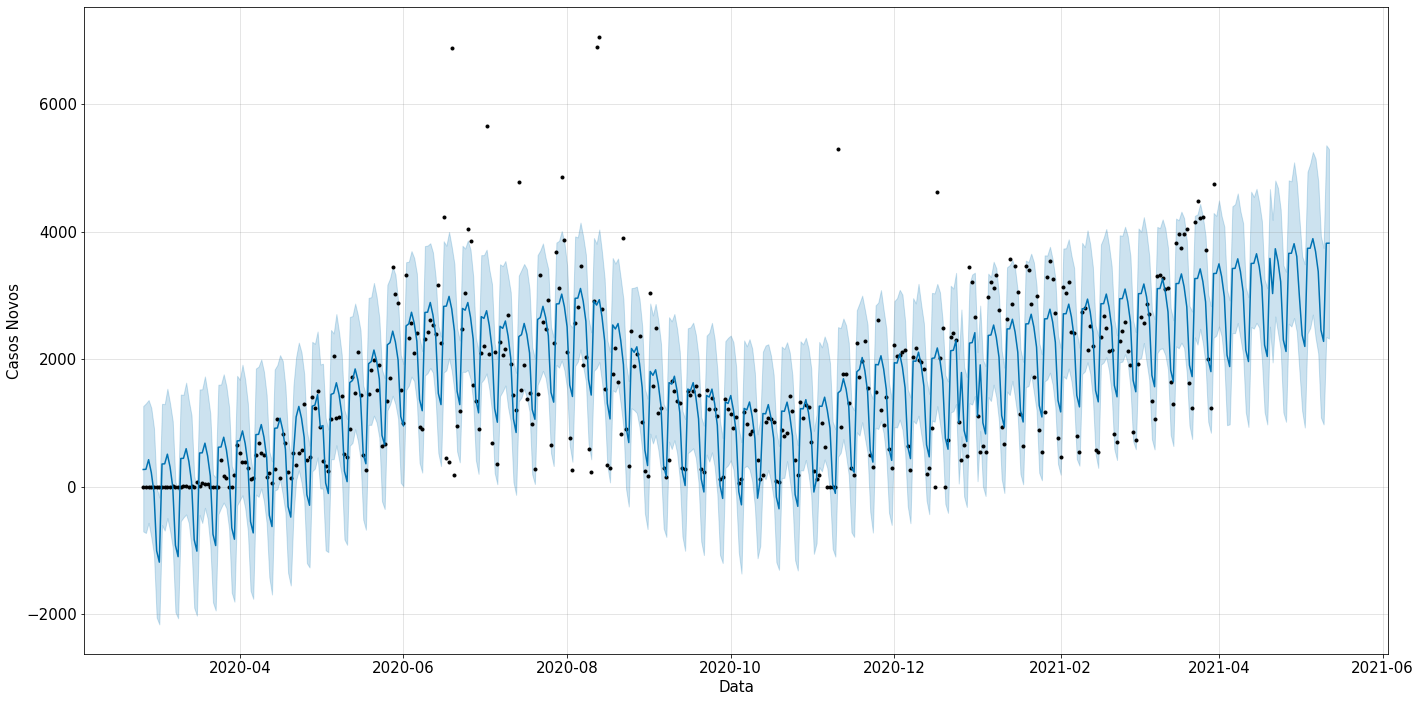

In [37]:
fig = modelo_changepoint.plot(previsao_changepoint, xlabel='Data', ylabel='Casos Novos', figsize=(20,10));

##### Feriados de São Paulo

In [38]:
#Usando feriados especificos do municipio de SP

feriados_sp_2020 = [
'2020-02-25', '2020-02-26',
'2020-04-10', '2020-04-21',
'2020-05-01', '2020-05-20',
'2020-05-21', '2020-05-22',
'2020-05-25', '2020-06-11',
'2020-09-07', '2020-10-12',
'2020-11-02', '2020-11-15',
'2020-12-25' ]

feriados_sp_2021 = [
'2021-01-01', '2021-01-25',
'2021-02-15', '2021-02-16',
'2021-02-17', '2021-03-26',
'2021-03-29', '2021-03-30',
'2021-03-31', '2021-04-01',
'2021-04-02', '2021-04-21',
'2021-05-01' ]

feriados_sp_2020 = pd.DataFrame({
  'holiday': 'sp_2020',
  'ds': pd.to_datetime(feriados_sp_2020)
})

feriados_sp_2021 = pd.DataFrame({
  'holiday': 'sp_2021',
  'ds': pd.to_datetime(feriados_sp_2021)
})

feriados = pd.concat((feriados_sp_2020, feriados_sp_2021))

In [39]:
# Usando os feriados do município de SP

modelo_feriados = Prophet(n_changepoints = 25, changepoint_prior_scale=10.0, holidays=feriados)
# modelo_feriados.add_country_holidays(country_name='BR')
modelo_feriados.fit(df_treino)
previsao_feriados = modelo_feriados.predict(modelo_feriados.make_future_dataframe(periods=43))

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


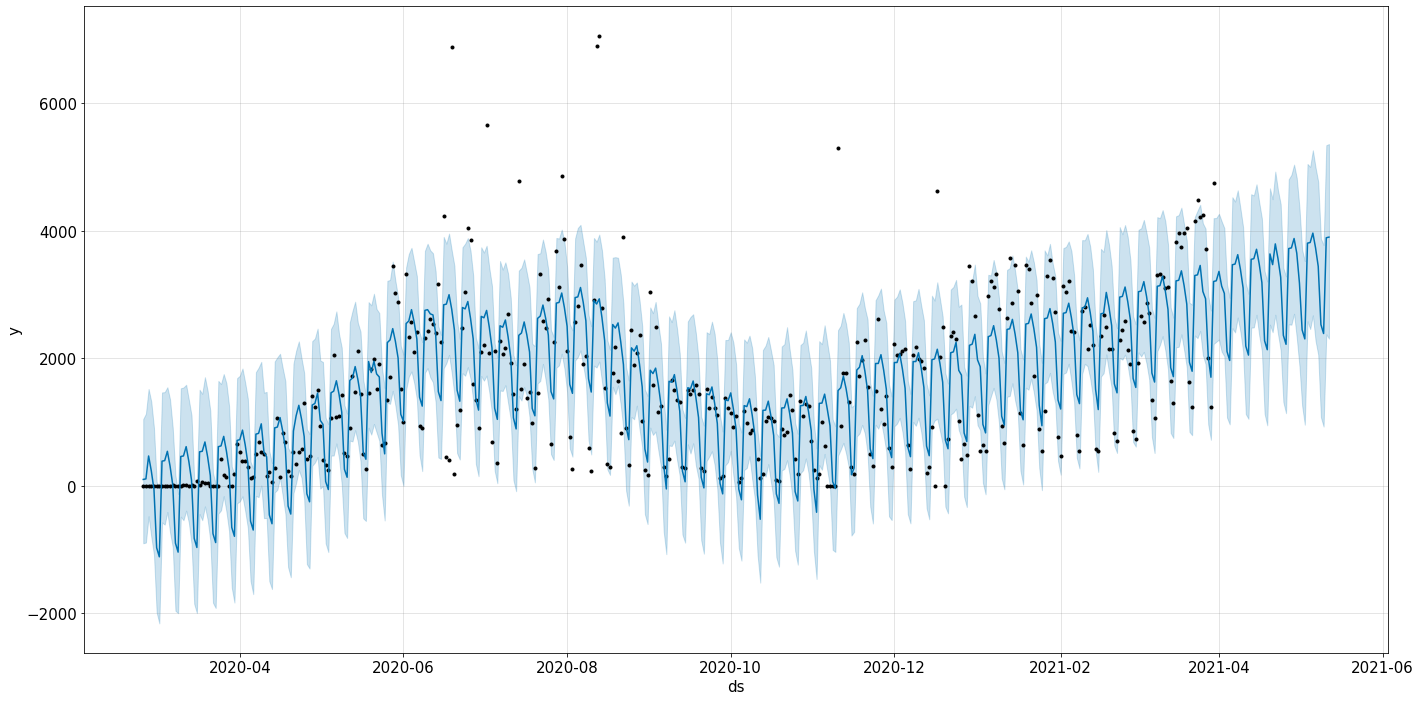

In [40]:
modelo_feriados.plot(previsao_feriados, figsize=(20,10));

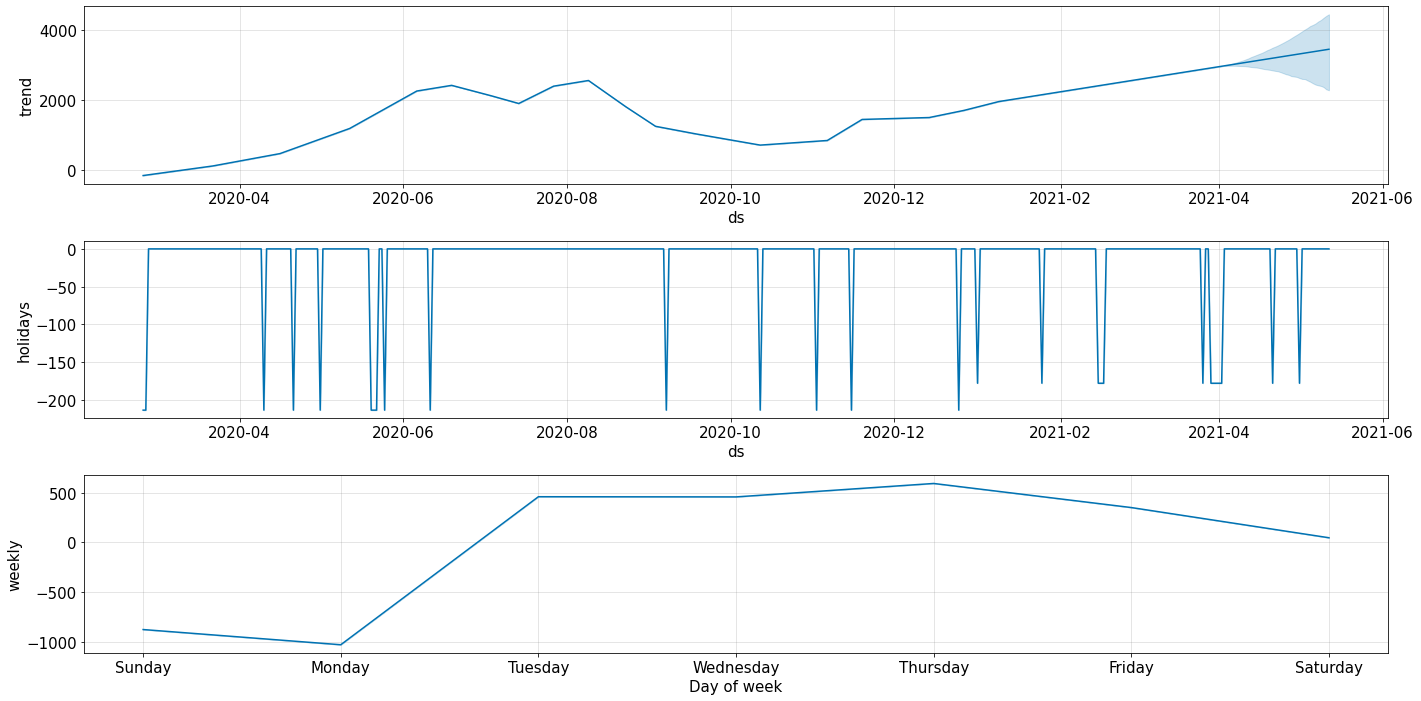

In [41]:
modelo_feriados.plot_components(previsao_feriados, figsize=(20,10));

#### Sazonalidade

In [42]:
# Importando as metrics do sklearn

from sklearn import metrics
# from sklearn.metrics import mean_absolute_error

***MAE — Mean Absolute Error***

O MAE, ou Erro Absoluto Médio. Essa métrica consiste em calcular o residual de cada ponto, onde valores residuais negativos e positivos não se anulam. Após esse agrupamento, calculamos então a média desses ‘residuais’.

$$MAE = \frac 1n\sum_{j=0}^{n}|y_j-\hat{y}_j|$$


---

Aplicando ```seasonality_mode='additive'``` ao nosso modelo e verificando o Erro Absoluto Médio.


In [43]:
# yearly_seasonality=True, daily_seasonality=True, , weekly_seasonality=7
modelo_additive = Prophet(n_changepoints=25, changepoint_prior_scale=10.0, seasonality_mode='additive', holidays=feriados) 
modelo_additive.fit(df_treino)
previsao_additive = modelo_additive.predict(modelo_additive.make_future_dataframe(periods=43))

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


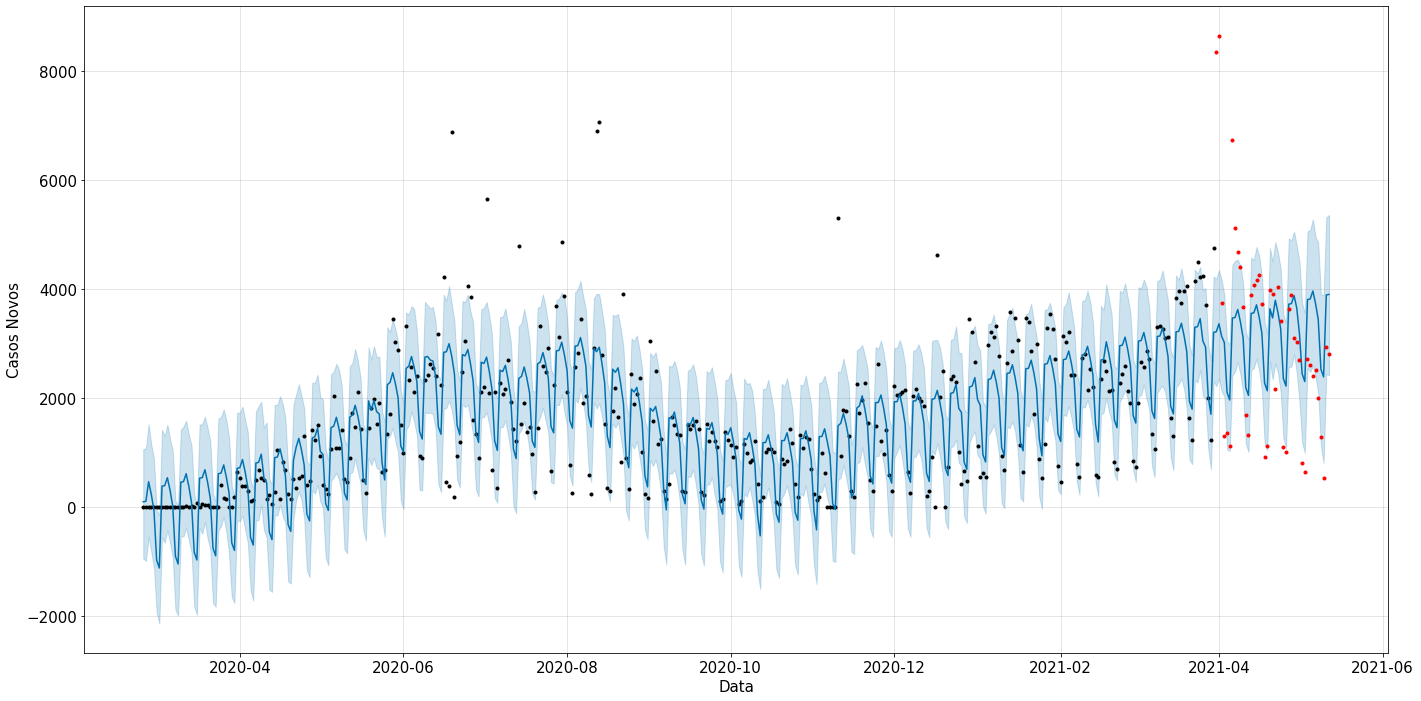

In [44]:
fig = modelo_additive.plot(previsao_additive, xlabel='Data', ylabel='Casos Novos', figsize=(20,10));
plt.plot(df_teste['ds'],df_teste['y'],'.r')
plt.show()

In [45]:
MAE=metrics.mean_absolute_error(df['y'], previsao_additive['yhat'])
EQM = metrics.mean_squared_error(df['y'], previsao_additive['yhat']).round(2)
REQM = np.sqrt(metrics.mean_squared_error(df['y'], previsao_additive['yhat'])).round(2)
R2 = metrics.r2_score(df['y'], previsao_additive['yhat']).round(2)

In [46]:
# teste com todo o dataframe, 
metrics.mean_absolute_error(dados_sp['casos_novos'], previsao['yhat'][:443])

649.7339717404537



---


Aplicando ```seasonality_mode='multiplicative'``` ao nosso modelo e verificando e média absoluta de erro.

In [47]:
modelo_multi = Prophet( n_changepoints=25, changepoint_prior_scale=10.0, seasonality_mode='multiplicative', holidays=feriados) 
modelo_multi.fit(df_treino)
previsao_multi = modelo_multi.predict(modelo_multi.make_future_dataframe(periods=43))

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


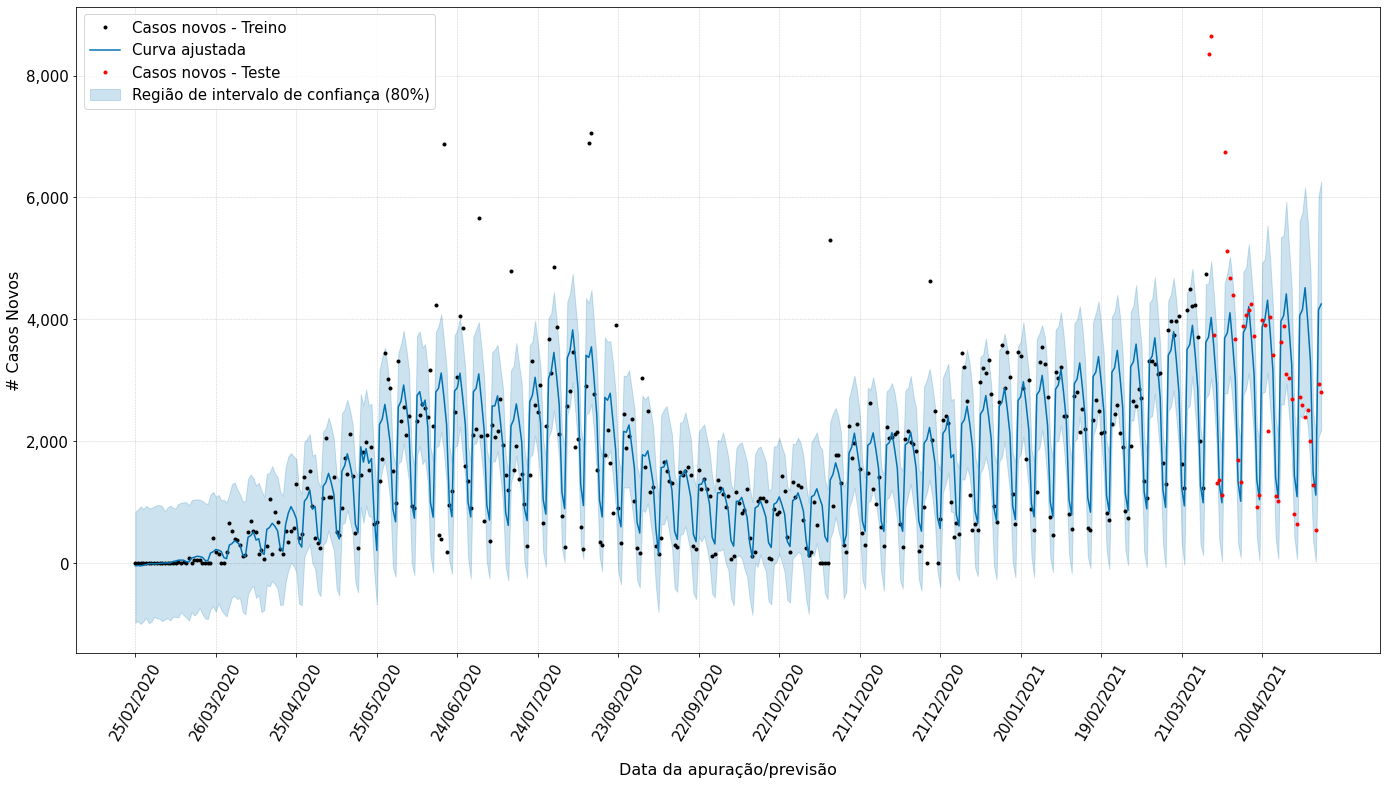

In [48]:
fig, ax = plt.subplots(figsize=(20, 10), sharex=True)
modelo_multi.plot(previsao_multi, xlabel='Data', ylabel='Casos Novos', figsize=(20,10), ax=ax);
# dados_sp.plot(x='datahora', y='casos_novos', ax=ax, color='black', linewidth=2, alpha=0.4, legend=False)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.xaxis.set_major_locator(ticker.IndexLocator(base=30,offset=0))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.plot(df_teste['ds'],df_teste['y'],'.r')
plt.grid(color='black', linestyle='--', linewidth=0.5)
plt.xlabel('Data da apuração/previsão', fontsize=16, labelpad=20)
plt.ylabel('# Casos Novos', fontsize=16)
plt.xticks(rotation = 60)
labels=['Casos novos - Treino','Curva ajustada','Casos novos - Teste','Região de intervalo de confiança (80%)']
plt.legend(labels=labels)
plt.show()

In [49]:
# Sazonalidade multiplicativa
MAE_2 = metrics.mean_absolute_error(df_treino['y'], previsao_multi['yhat'][:400])
EQM_2 = metrics.mean_squared_error(df_treino['y'], previsao_multi['yhat'][:400]).round(2)
REQM_2 = np.sqrt(metrics.mean_squared_error(df_treino['y'], previsao_multi['yhat'][:400])).round(2)
R2_2 = metrics.r2_score(df_treino['y'], previsao_multi['yhat'][:400]).round(2)

###**Desafios #5**

**Desafio Extra** - Utilizar outras métricas do Scikitlearn e comparar os resultados.


### Erro Quadrático Médio

Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$


### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entre 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$


#### Obtendo métricas para o modelo com ```seasonality_mode='additive'```

In [50]:
pd.options.display.float_format = "{:.3f}".format
pd.DataFrame([MAE, EQM, REQM, R2], ['MAE', 'EQM', 'REQM', 'R²'], columns=['Modo additive'])

Modo additive
MAE         598.703
EQM      794672.870
REQM        891.440
R²            0.610

#### Obtendo métricas para o modelo com ```seasonality_mode='multiplicative'```

In [51]:
pd.options.display.float_format = "{:.3f}".format
pd.DataFrame([MAE_2, EQM_2, REQM_2, R2_2], ['MAE', 'EQM', 'REQM', 'R²'], columns=['Modo multiplicative'])

Modo multiplicative
MAE               452.362
EQM            523056.040
REQM              723.230
R²                  0.680

Baseados nos valores das métricas o melhor modelo é o com seasonality_mode = 'multiplicative' 

---
O que aprendemos nesta aula:
* Efeito da sazonalidade e feriados em uma série temporal;
* Sazonalidade aditiva e sazonalidade multiplicativa;
* Previsões considerando sazonalidade e feriados com o PROPHET.

## Aula 05 - Outliers e validação

### Outliers e intervalo de confiança

In [52]:
novo_y = df_treino.reset_index()
novo_y

index         ds     y
0       562 2020-02-25     0
1      1207 2020-02-26     0
2      1852 2020-02-27     0
3      2497 2020-02-28     1
4      3142 2020-02-29     0
..      ...        ...   ...
395  255337 2021-03-26  4241
396  255982 2021-03-27  3709
397  256627 2021-03-28  2010
398  257272 2021-03-29  1242
399  257917 2021-03-30  4748

[400 rows x 3 columns]

In [53]:
sem_outliers = novo_y[(novo_y['y'] > previsao_multi['yhat_lower'][:400]) & (novo_y['y'] < previsao_multi['yhat_upper'][:400])]

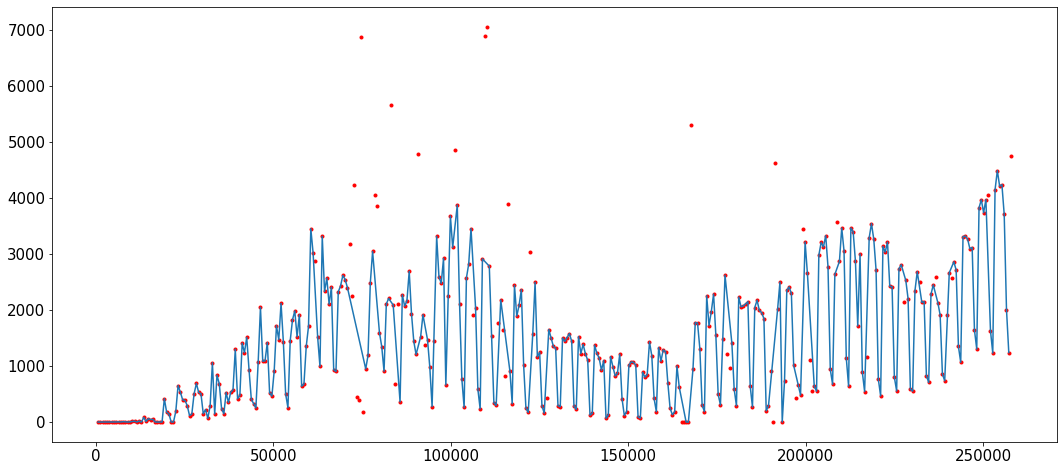

In [54]:
plt.plot(df_treino.index, df_treino['y'], 'r.')
plt.plot(sem_outliers['index'], sem_outliers['y'])

In [55]:
df_sem_outliers = sem_outliers[['ds','y']]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


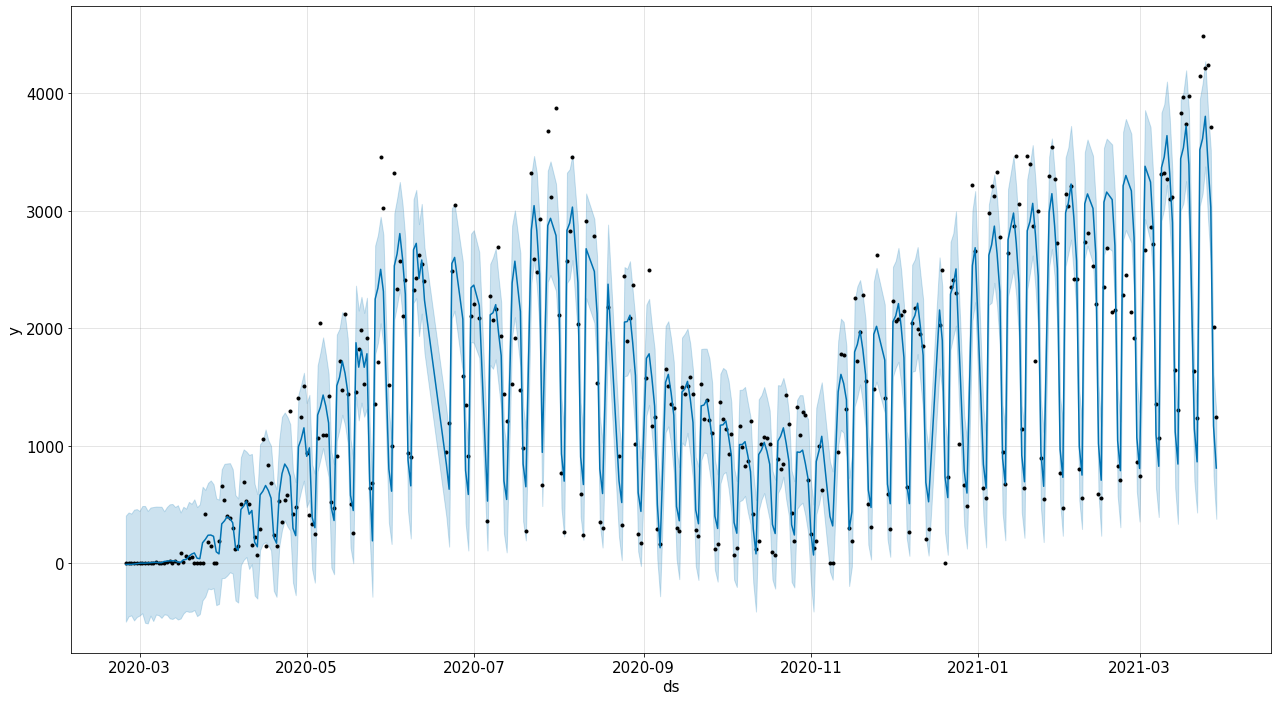

In [56]:
modelo_sem_outliers = Prophet(changepoint_prior_scale=10.0, seasonality_mode='multiplicative', holidays=feriados) 
modelo_sem_outliers.fit(df_sem_outliers)
previsao_sem_outliers = modelo_sem_outliers.predict(modelo_sem_outliers.make_future_dataframe(periods=0))
fig = modelo_sem_outliers.plot(previsao_sem_outliers, figsize=(18,10));

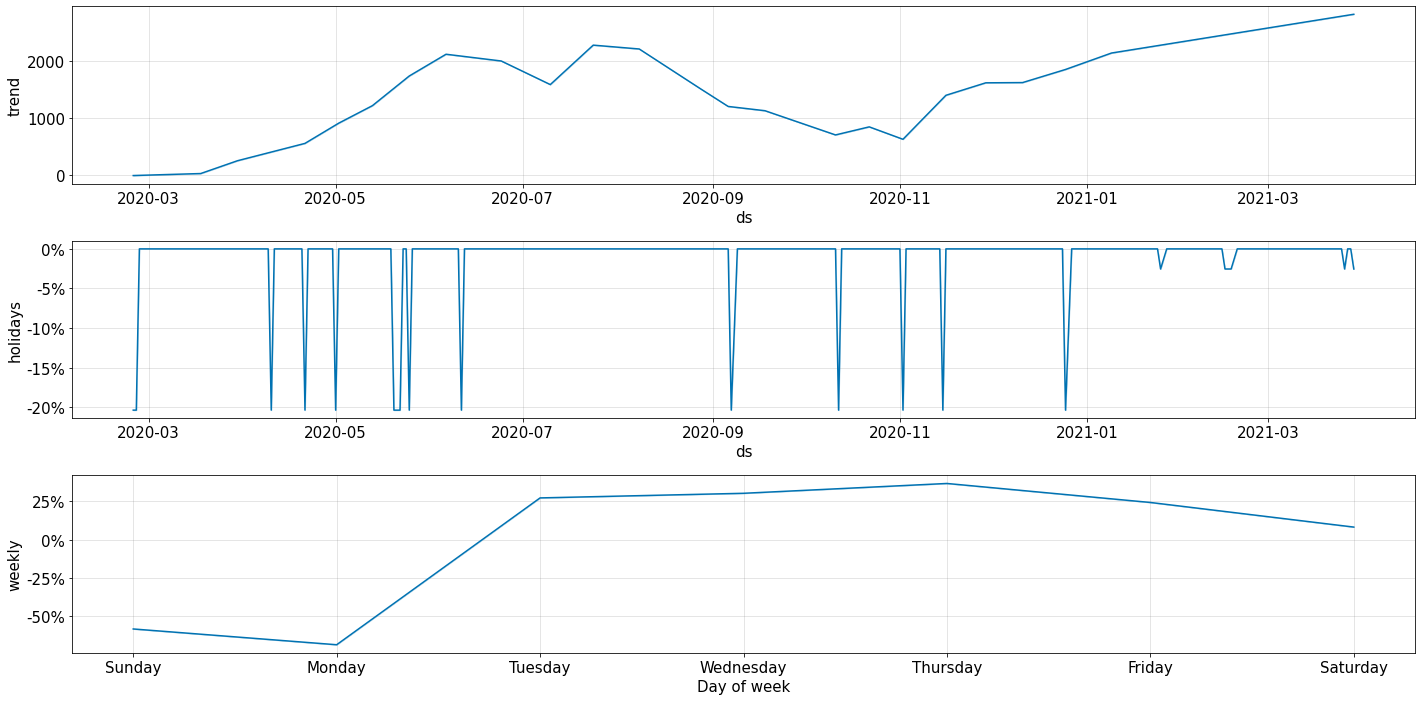

In [57]:
modelo_sem_outliers.plot_components(previsao_sem_outliers, figsize=(20,10));

In [58]:
previsao_sem_outliers = modelo_sem_outliers.predict(modelo_sem_outliers.make_future_dataframe(periods=43))
amostras = modelo_sem_outliers.predictive_samples(previsao_sem_outliers)

Quando precisamos estimar coeficientes *a* e *b* da reta, mas para isso ele "chuta" esses coeficientes e depois do chute ele ajusta os coeficientes até chegar a um bom resultado da curva aos dados.

Como os coeficientes foram aleatórios (chutes), a solução seria diferente se os coeficientes chutados fossem outros. Nesse caso, seriam mil soluções diferentes. O Prophet tentou iniciar uma previsão com mil testes diferentes e chegou a mil respostas diferentes, essas respostas estão representadas pelas linhas coloridas dentro do intervalo de confiança no gráfico gerado.

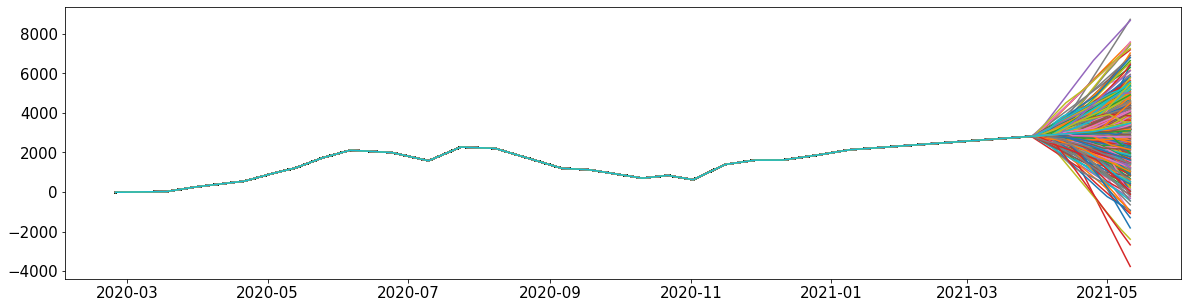

In [59]:
plt.figure(figsize=(20,5))
plt.plot(previsao_sem_outliers['ds'], amostras['trend']);

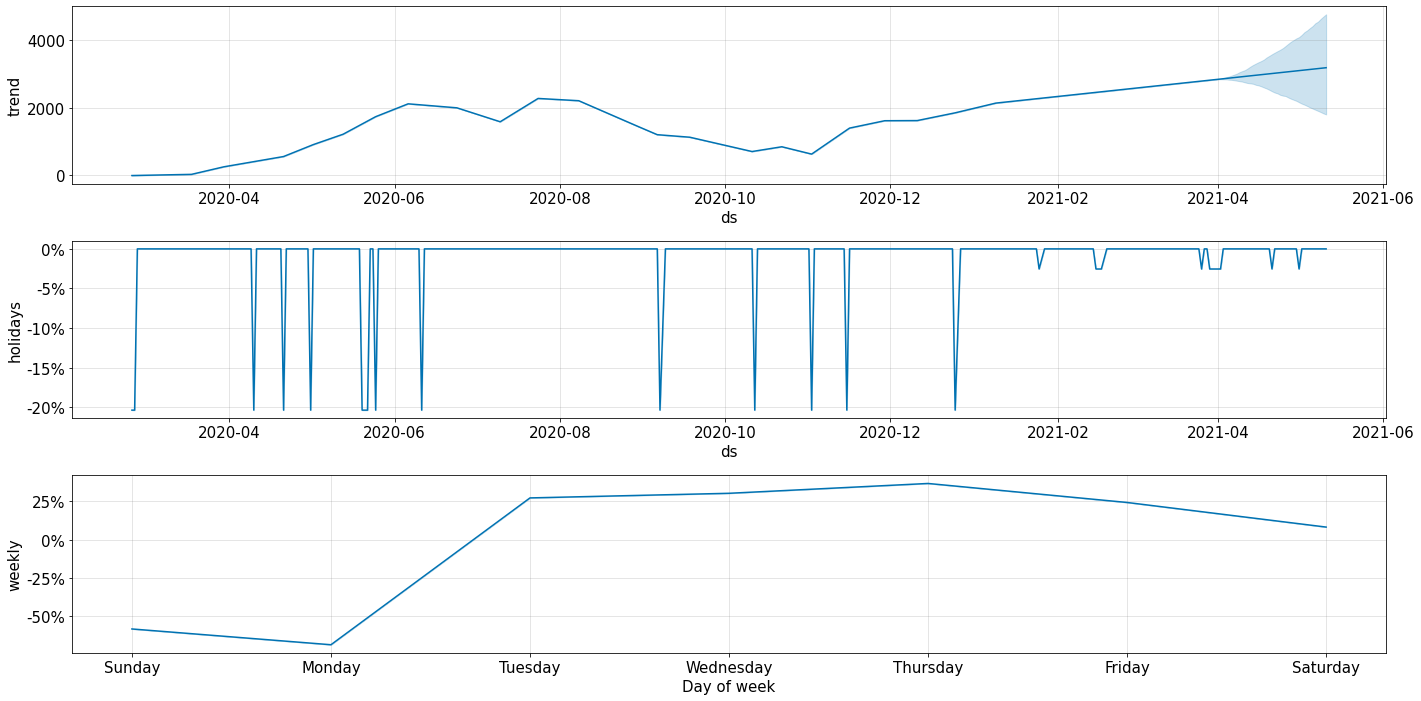

In [60]:
modelo_sem_outliers.plot_components(previsao_sem_outliers, figsize=(20,10));

### Validação cruzada e métricas de avaliação

In [61]:
from fbprophet.diagnostics import cross_validation

In [62]:
df_cv = cross_validation(modelo_sem_outliers, initial='180 days', period='30 days', horizon='30 days')

INFO:fbprophet:Making 7 forecasts with cutoffs between 2020-08-31 00:00:00 and 2021-02-27 00:00:00


In [63]:
df_cv

ds     yhat  yhat_lower  yhat_upper     y     cutoff
0   2020-09-02 1962.289    1498.089    2381.980  1579 2020-08-31
1   2020-09-03 2012.783    1577.637    2429.278  2496 2020-08-31
2   2020-09-04 2032.473    1591.938    2494.861  1166 2020-08-31
3   2020-09-05 1517.810    1084.535    1980.144  1245 2020-08-31
4   2020-09-06  654.778     227.202    1102.790   290 2020-08-31
..         ...      ...         ...         ...   ...        ...
183 2021-03-25 3180.417    2044.188    4273.260  4214 2021-02-27
184 2021-03-26 2674.739    1634.481    3709.828  4241 2021-02-27
185 2021-03-27 2542.674    1511.547    3526.459  3709 2021-02-27
186 2021-03-28  877.065     322.525    1470.650  2010 2021-02-27
187 2021-03-29  451.721     -13.692     948.969  1242 2021-02-27

[188 rows x 6 columns]

In [64]:
janela = 5

In [65]:
cutoff = df_cv['cutoff'].unique()[janela]

In [66]:
df_cv_cut = df_cv[ df_cv['cutoff'].values == cutoff]

Text(0.5, 0, 'ds')

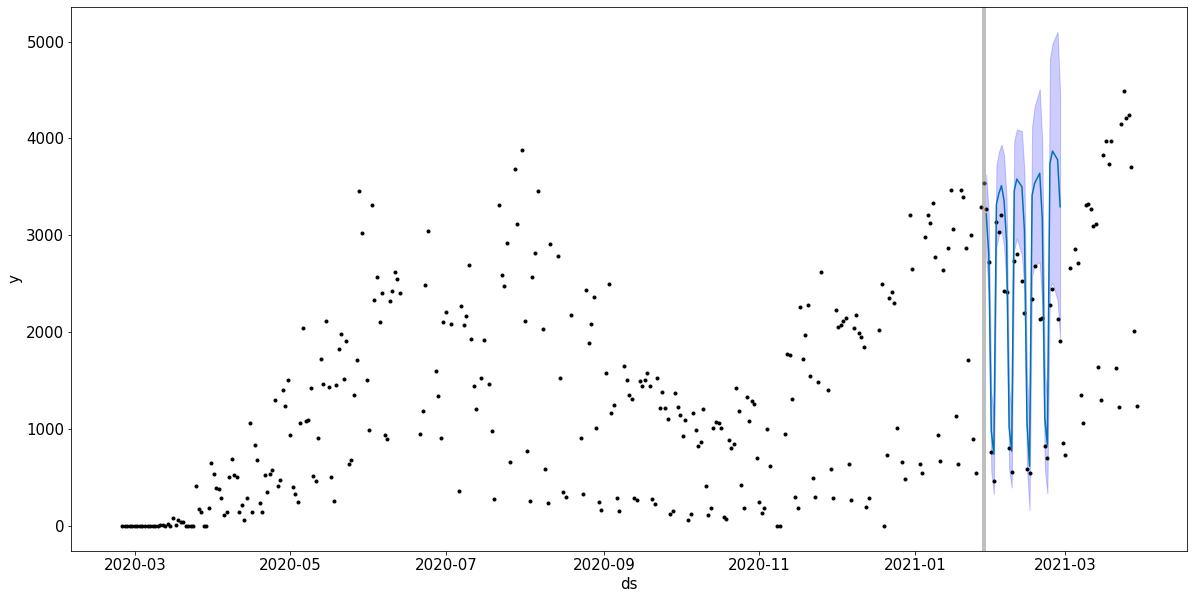

In [67]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.plot(modelo_sem_outliers.history['ds'].values, modelo_sem_outliers.history['y'], 'k.')
ax.plot(df_cv_cut['ds'].values, df_cv_cut['yhat'], ls='-', c='#0072B2')
ax.fill_between( df_cv_cut['ds'].values, df_cv_cut['yhat_lower'],
                 df_cv_cut['yhat_upper'], color='blue',
                alpha=0.2)
ax.axvline(x=pd.to_datetime(cutoff), c='gray', lw=4, alpha=0.5)
ax.set_ylabel('y')
ax.set_xlabel('ds')

In [68]:
from fbprophet.diagnostics import performance_metrics

In [69]:
pd.reset_option("all")


: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



In [70]:
df_p = performance_metrics(df_cv)

INFO:fbprophet:Skipping MAPE because y close to 0


In [71]:
df_p

horizon            mse        rmse         mae     mdape  coverage
0   3 days   67639.889065  260.076698  185.479947  0.153889  0.888889
1   4 days  122094.612390  349.420395  263.957827  0.201142  0.833333
2   5 days  114803.093534  338.826052  252.992012  0.216762  0.833333
3   6 days  118694.499444  344.520681  266.033111  0.181620  0.851852
4   7 days   68825.446921  262.346044  214.597049  0.129400  0.944444
5   8 days  145847.387649  381.899709  308.167513  0.159307  0.777778
6   9 days  139109.345523  372.973653  297.148037  0.148891  0.777778
7  10 days  155043.602644  393.755765  332.564325  0.218956  0.755556
8  11 days  117527.614152  342.823007  304.054259  0.195089  0.904762
9  12 days  114561.101021  338.468759  282.026670  0.157890  0.904762
10 13 days  171201.861481  413.765467  319.741309  0.157890  0.833333
11 14 days  220402.485340  469.470431  364.577230  0.232518  0.682540
12 15 days  296497.047699  544.515425  450.357831  0.329437  0.571429
13 16 days  274799.138634  524.212875  431.413087  0.354007  0.555556
14 17 days  276802.453036  526.120189  434.551716  0.294414  0.611111
15 18 days  353229.431671  594.331079  452.545396  0.236201  0.611111
16 19 days  413336.820944  642.912763  501.042879  0.236201  0.629630
17 20 days  484488.616045  696.052165  556.575469  0.251922  0.611111
18 21 days  509073.180329  713.493644  576.029790  0.267147  0.626984
19 22 days  574551.214464  757.991566  597.895389  0.275146  0.579365
20 23 days  486035.601160  697.162536  543.249417  0.363475  0.633333
21 24 days  464138.343104  681.276994  522.291395  0.312104  0.682540
22 25 days  453187.037329  673.191679  513.533240  0.266256  0.769841
23 26 days  775975.979318  880.894988  644.899403  0.270943  0.769841
24 27 days  925438.813392  961.997304  736.399678  0.337306  0.730159
25 28 days  927372.010269  963.001563  738.782017  0.341886  0.706349
26 29 days  830717.128209  911.436848  708.896890  0.571869  0.690476
27 30 days  642596.602158  801.621234  623.541331  0.559633  0.700000

In [72]:
from fbprophet.plot import plot_cross_validation_metric

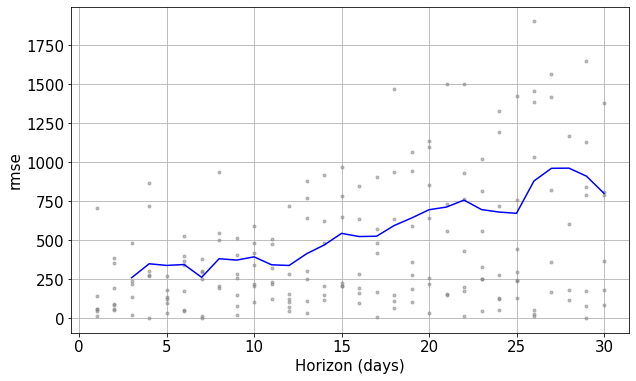

In [73]:
plot_cross_validation_metric(df_cv, metric='rmse');

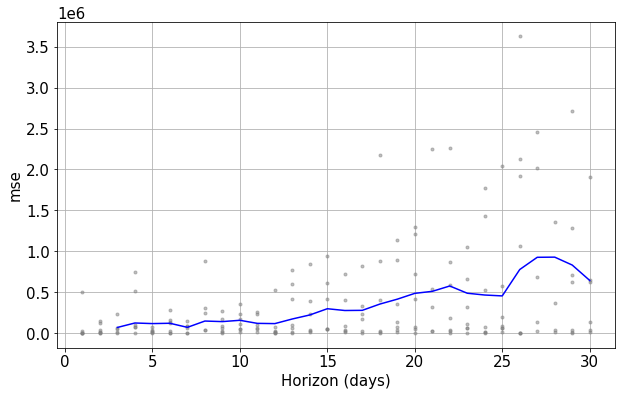

In [74]:
plot_cross_validation_metric(df_cv, metric='mse');

###**Desafios #6**

**Desafio 13** - Testar diferentes intervalos de confiança. (interval_width: Float)

**Desafio 14** - Buscar quais métricas se aplicam a quais casos

####Desafio 13

Testar o interval_width

In [75]:
# função criar a previsão, df de treino e teste
# recebe o Dataframe de treino, o período de previsão e o modelo 
# configurado com os parâmetros desejados
# retorna a previsao, df_treino, df_teste
from fbprophet import Prophet
import pandas as pd

def processar_modelo(modelo, df: pd.DataFrame, previsao: int):
  numTreino = int(df.shape[0] * 0.8)
  numTeste  = (df.shape[0] - numTreino)
  # 70%
  df_treino = pd.DataFrame()
  df_treino['ds'] = df['datahora'][:numTreino]
  df_treino['y']  = df['casos_novos'][:numTreino]
  # 30%
  df_teste = pd.DataFrame()
  df_teste['ds'] = df['datahora'][numTreino:]
  df_teste['y']  = df['casos_novos'][numTreino:]
  
  # Treinando o modelo com 80% dos dados
  modelo.fit(df_treino)
  # Gerando a previsão
  previsao = modelo.predict(modelo.make_future_dataframe(periods=previsao))
  return previsao, df_treino, df_teste

In [76]:
# as 10 cidades mais populosas do Estado de São Paulo
dadostemp = dados[['nome_munic', 'pop']]
dadostemp.drop_duplicates(ignore_index=True, inplace=True)
dadostemp.sort_values(by='pop', ascending=False).head(10)

nome_munic       pop
562              São Paulo  11869660
212              Guarulhos   1351275
108               Campinas   1175501
544  São Bernardo do Campo    812086
557    São José dos Campos    710654
534            Santo André    693867
487         Ribeirão Preto    683777
387                 Osasco    680964
581               Sorocaba    658547
330                   Mauá    460132

In [77]:
dados_analise = dados[dados.nome_munic.eq('Campinas')]
dados_treino = pd.DataFrame()
dados_teste  = pd.DataFrame()

In [78]:
# Testar com interval_width=0.4 de 40%
modeloDesafio = Prophet(n_changepoints=70, 
                        changepoint_prior_scale=2,
                        seasonality_mode='multiplicative', 
                        holidays=feriados, interval_width=0.7)
# valores default
# modeloDesafio = Prophet( n_changepoints=25, changepoint_prior_scale=0.05, 
#                        seasonality_prior_scale=10.0,
#                        seasonality_mode='additive', 
#                        changepoint_range=0.8,
#                        holidays_prior_scale=10.0,
#                        yearly_seasonality='auto',
#                        daily_seasonality='auto',
#                        interval_width=0.8
#                         )
# modeloDesafio.add_country_holidays(country_name='BR')
previsaoDesafio, dados_treino, dados_teste = processar_modelo(modeloDesafio, dados_analise, 100)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


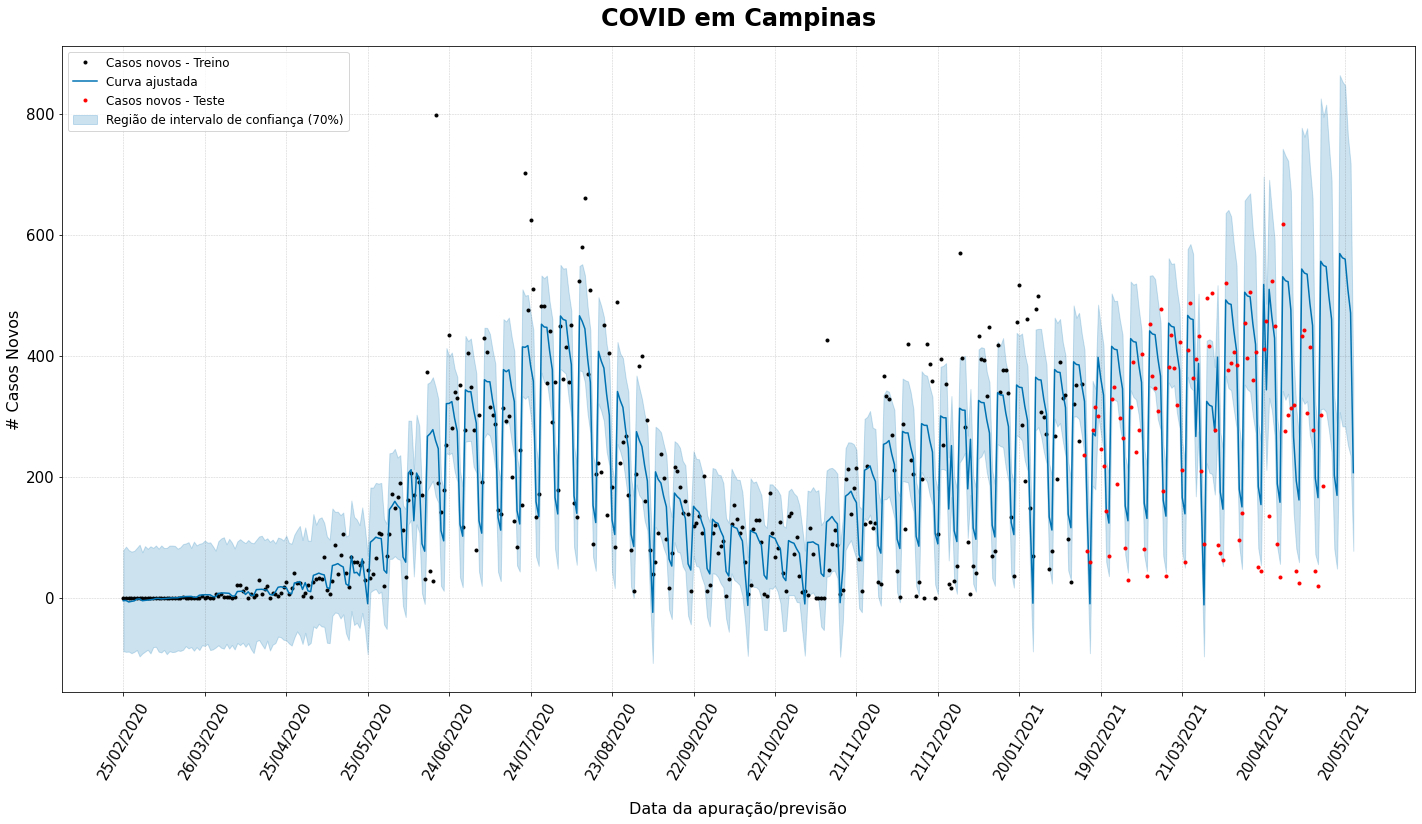

In [79]:
fig, ax = plt.subplots(figsize=(20, 10), sharex=True)
modeloDesafio.plot(previsaoDesafio, xlabel='Data', ylabel='Casos Novos', figsize=(20,10), ax=ax);
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.xaxis.set_major_locator(ticker.IndexLocator(base=30,offset=0))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.plot(dados_teste['ds'],dados_teste['y'],'.r')
plt.grid(color='black', linestyle='--', linewidth=0.5)
plt.title('COVID em Campinas', fontsize=24, fontweight='bold', pad=20)
plt.xlabel('Data da apuração/previsão', fontsize=16, labelpad=20)
plt.ylabel('# Casos Novos', fontsize=16)
plt.xticks(rotation = 60)
labels=['Casos novos - Treino','Curva ajustada','Casos novos - Teste','Região de intervalo de confiança (70%)']
plt.legend(labels=labels, loc='upper left', fontsize=12)
# a = add_changepoints_to_plot(fig.gca(), modeloDesafio, previsaoDesafio)
plt.show()

Validando o modelo

In [80]:
df_cv_d = cross_validation(modeloDesafio, initial='180 days', period='30 days', horizon='30 days')

INFO:fbprophet:Making 5 forecasts with cutoffs between 2020-09-15 00:00:00 and 2021-01-13 00:00:00


In [81]:
df_p_d = performance_metrics(df_cv_d)

INFO:fbprophet:Skipping MAPE because y close to 0


In [82]:
display(df_cv_d.head(10))
display(df_p_d.head(10))

ds        yhat  yhat_lower  yhat_upper    y     cutoff
0 2020-09-16  150.526913   66.790328  235.235035  210 2020-09-15
1 2020-09-17  136.075066   41.898824  222.881732  183 2020-09-15
2 2020-09-18  126.590866   50.011809  211.120774  141 2020-09-15
3 2020-09-19  103.131231   19.445855  194.192745  161 2020-09-15
4 2020-09-20   55.240683  -18.831218  142.362814  138 2020-09-15
5 2020-09-21   41.529226  -40.741327  127.082480   11 2020-09-15
6 2020-09-22   91.628791   10.347820  176.604259  119 2020-09-15
7 2020-09-23   94.049188   10.045518  177.521134  124 2020-09-15
8 2020-09-24   82.128119    2.986748  168.470264  136 2020-09-15
9 2020-09-25   73.390912   -7.442385  151.162500  108 2020-09-15

horizon           mse        rmse        mae     mdape  coverage
0  3 days   8315.849360   91.191279  60.921230  0.375846  0.800000
1  4 days  10115.679294  100.576733  70.076621  0.375846  0.666667
2  5 days   8690.723975   93.224053  78.354016  0.396461  0.533333
3  6 days   8033.973416   89.632435  79.231580  0.560079  0.533333
4  7 days   7645.006879   87.435730  75.980962  0.532476  0.533333
5  8 days   6973.876940   83.509742  68.376371  0.408876  0.600000
6  9 days   8867.338989   94.166549  73.402187  0.396117  0.600000
7 10 days   8138.881745   90.215751  72.161969  0.396117  0.666667
8 11 days  10202.905573  101.009433  79.035376  0.396117  0.600000
9 12 days  14113.587256  118.800620  93.370809  0.622225  0.533333

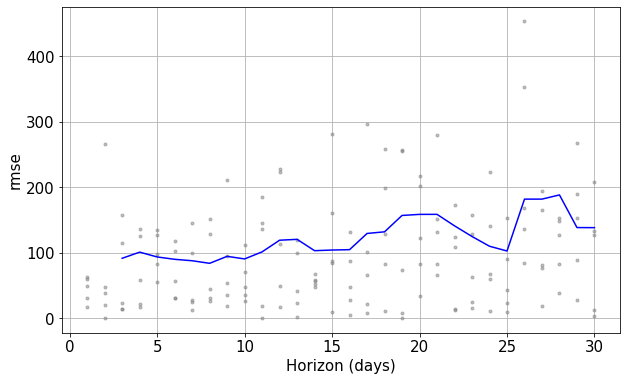

In [83]:
plot_cross_validation_metric(df_cv_d, metric='rmse');

Alterando o parâmetro *interval_width* a área sombreada azul-claro se altera, aumentando ou diminuindo a quantidade de ponto pretos dentro do intervalo de confiança.

####Desafio 14

Existem diversos tipos de métricas diferentes, mas o que poderíamos dizer sobre todas elas é que são medidas do quanto estamos errando na nossa previsão. Podemos pensar que uma medida é mais adequada para determinado caso, por exemplo, em uma série temporal de valores negativos ou positivos.

Geralmente, métricas robustas são as que utilizam valores absolutos, a **mae**, por exemplo.

Falta apresentar quais métricas se aplicam a quais casos.


---
O que aprendemos nesta aula:
* Tratamento de outliers;
* Intervalo de confiança;
* Validação cruzada de encadeamento direto;
* Métricas de performance.